In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.api import qqplot
from statsmodels.graphics import tsaplots

In [2]:
import Quandl

In [3]:
%matplotlib inline
plt.style.use('bmh');
sns.set_style("whitegrid", {'axes.edgecolor': '.6', 'axes.facecolor': '0.9', 'grid.color': '.82'})

In [4]:
vz = Quandl.get("WIKI/VZ", trim_start="1984-07-19")
att = Quandl.get("WIKI/T", trim_start="1984-07-19")

In [6]:
assert vz.shape == att.shape
time = vz.index

In [9]:
vz.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [11]:
att.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [12]:
vz.tail(1)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-02-24,50.27,50.87,50.17,50.82,11216426,0,1,50.27,50.87,50.17,50.82,11216426


In [13]:
att.tail(1)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-02-24,36.7,37.11,36.63,37.1,22729691,0,1,36.7,37.11,36.63,37.1,22729691


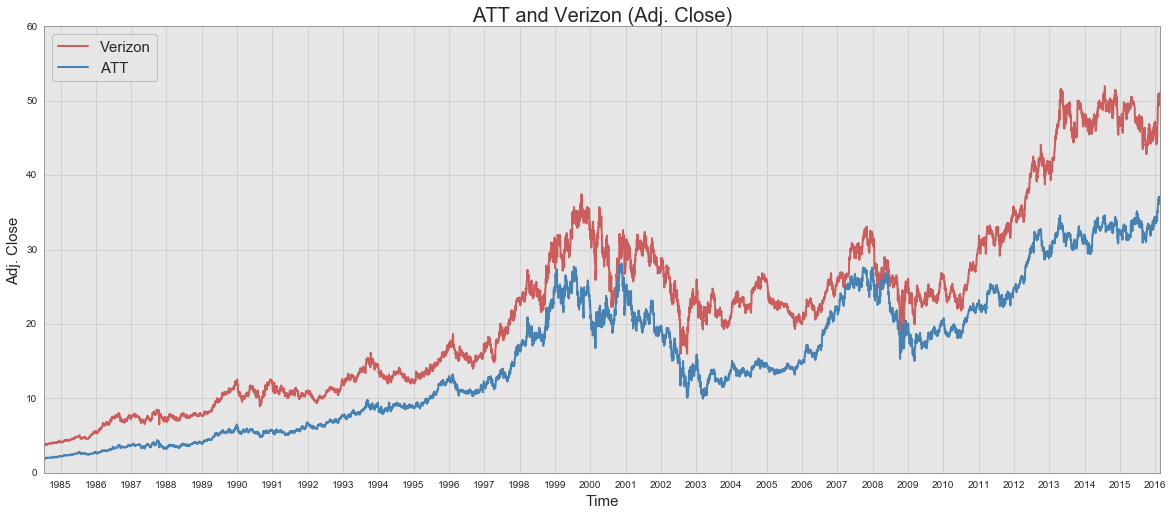

In [69]:
fig, ax = plt.subplots(figsize=(20,8));
years = YearLocator();
yearsFmt = DateFormatter('%Y');

ax.xaxis.set_major_locator(years);
ax.xaxis.set_major_formatter(yearsFmt);
ax.autoscale_view();

plt.title('ATT and Verizon (Adj. Close)', fontsize=20);
plt.ylabel('Adj. Close', fontsize=15);
plt.xlabel('Time', fontsize=15);

ax.plot_date(time, vz['Adj. Close'], 'indianred', label='Verizon');
ax.plot_date(time, att['Adj. Close'], 'steelblue', label='ATT');

plt.legend(loc=2, prop={'size':15}, frameon=True);

In [8]:
ratio = (vz['Adj. Close'] / att['Adj. Close'])

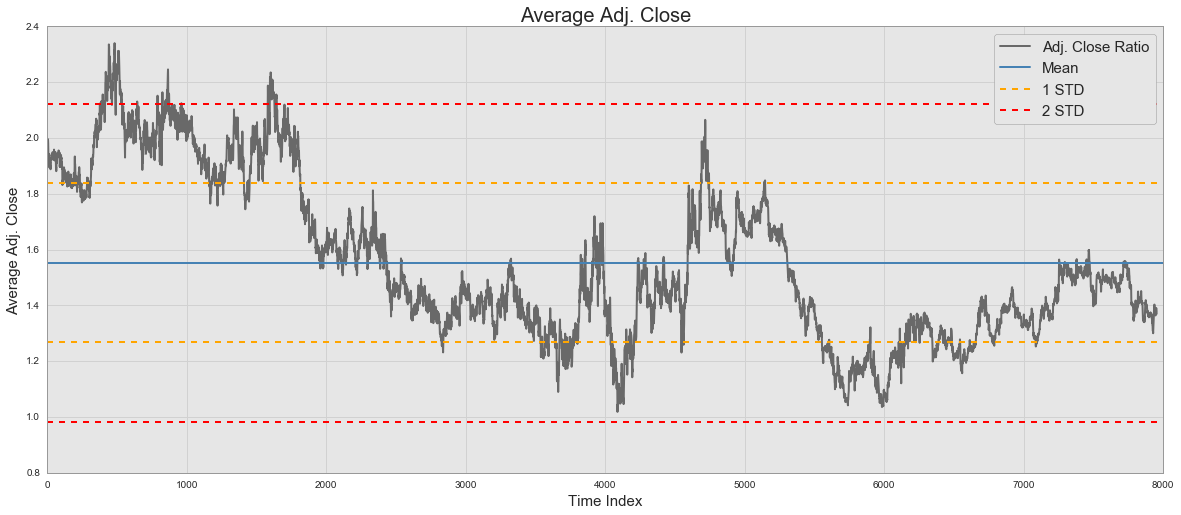

In [88]:
fig = plt.subplots(figsize=(20,8));

plt.title('Average Adj. Close', fontsize=20);
plt.ylabel('Average Adj. Close', fontsize=15);
plt.xlabel('Time Index', fontsize=15);

plt.plot(np.arange(ratio.size), ratio, 'dimgrey', label='Adj. Close Ratio');
plt.plot([0, 8000], [ratio.mean(), ratio.mean()], 'steelblue', lw=2, label='Mean');

for color, std in zip(['orange','red'], range(1,3)):
    plt.plot([0, 8000], [ratio.mean()-std*ratio.std(), ratio.mean()-std*ratio.std()], 
             '--', lw=2, label=str(std)+' STD', color=color);
    plt.plot([0, 8000], [ratio.mean()+std*ratio.std(), ratio.mean()+std*ratio.std()], 
             '--', lw=2, color=color);

plt.legend(loc=1, prop={'size':15}, frameon=True);

In [18]:
avg_adj_close = ((vz['Adj. Close'] + att['Adj. Close'])/2)

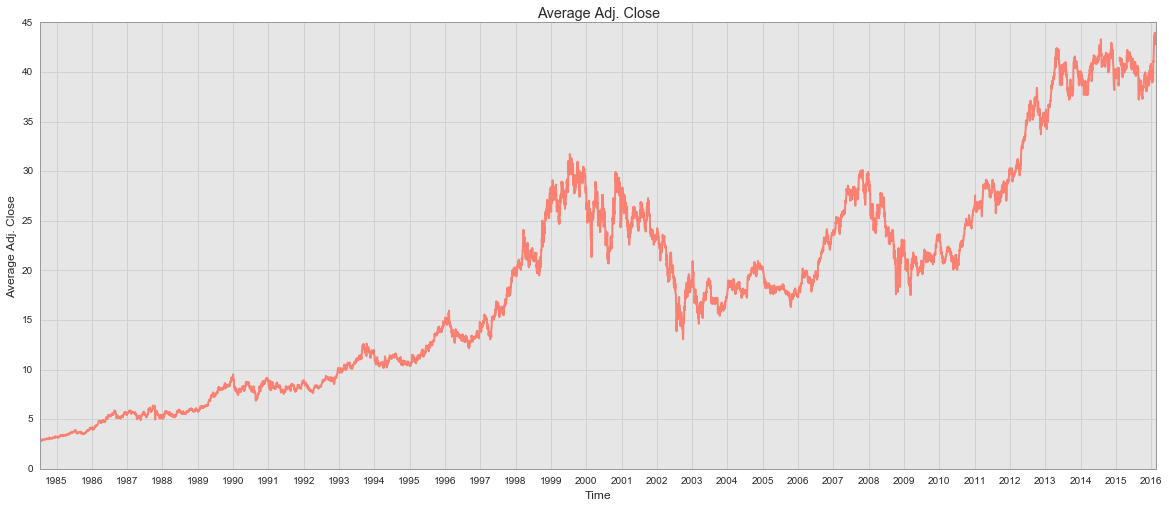

In [20]:
fig, ax = plt.subplots(figsize=(20,8));
years = YearLocator();    # every year
yearsFmt = DateFormatter('%Y');

ax.xaxis.set_major_locator(years);
ax.xaxis.set_major_formatter(yearsFmt);
ax.autoscale_view();

plt.title('Average Adj. Close');
plt.ylabel('Average Adj. Close');
plt.xlabel('Time');

ax.plot_date(avg_adj_close.index, avg_adj_close, 'salmon');

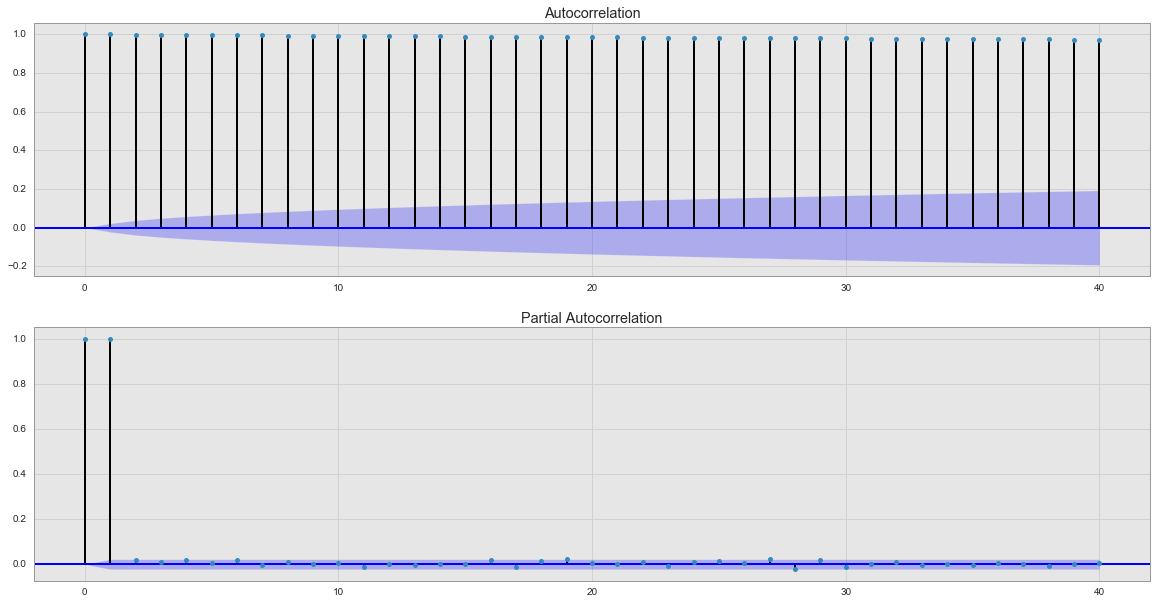

In [25]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(avg_adj_close.dropna().values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(avg_adj_close.dropna().values, lags=40, ax=ax2)

In [390]:
def moving_average(ts, theta1):
    ma = pd.Series(index=ts.index, data=np.repeat(0, ts.size))
    ma[0] = ts[0]
    
    for idx in range(1,ts.size):
        ma[idx] = theta1*ts[idx-1]
        
    return ma

In [391]:
ma = moving_average(avg_adj_open, 0.9)

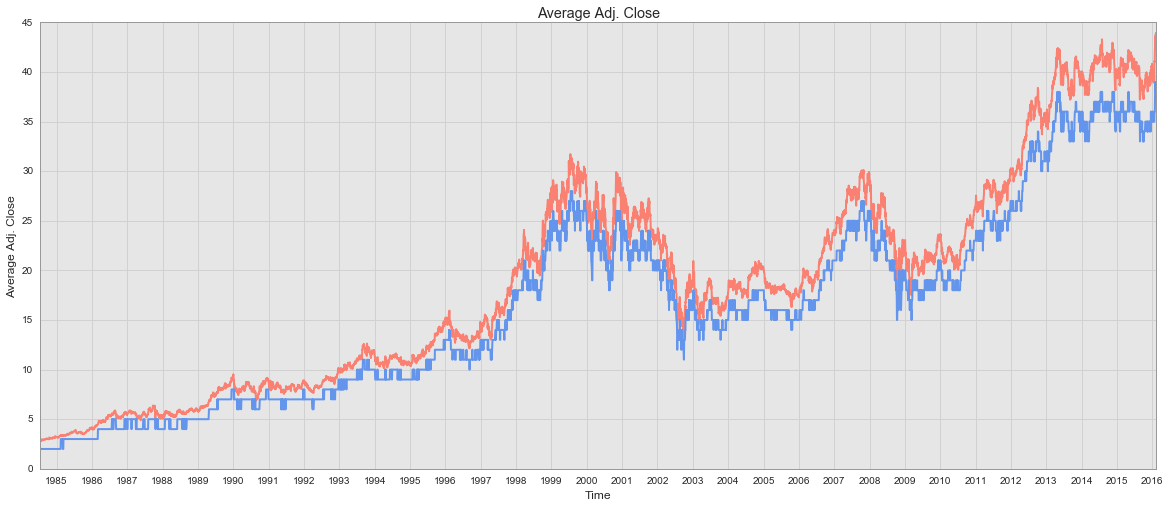

In [392]:
fig, ax = plt.subplots(figsize=(20,8));
years = YearLocator();    # every year
yearsFmt = DateFormatter('%Y');

ax.xaxis.set_major_locator(years);
ax.xaxis.set_major_formatter(yearsFmt);
ax.xaxis.set_minor_locator(months);
ax.autoscale_view();

plt.title('Average Adj. Close');
plt.ylabel('Average Adj. Close');
plt.xlabel('Time');

ax.plot_date(avg_adj_open.index, avg_adj_open, 'salmon');
ax.plot_date(avg_adj_open.index, ma, 'cornflowerblue');